In [1]:
%load_ext autoreload
%autoreload 2

[('べ', 105.68571428571428),
 ('ん', 117.43333333333334),
 ('きょ', 149.2),
 ('う', 138.13888888888886),
 ('し', 145.22727272727272),
 ('ま', 144.87073170731708),
 ('す', 433.03999999999996)]

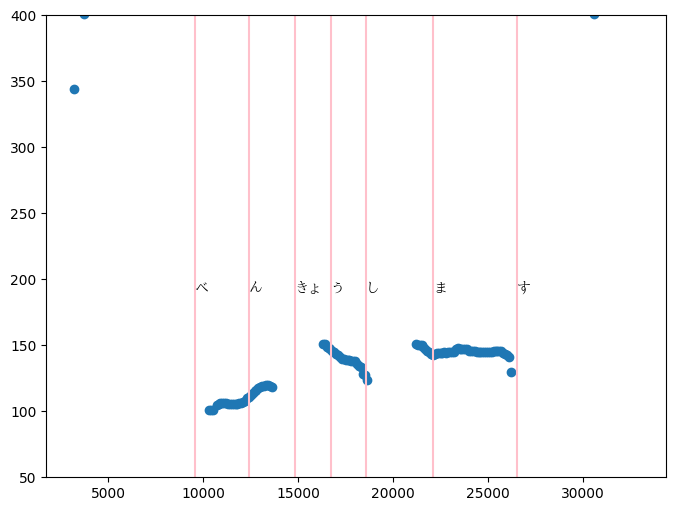

In [29]:

from koutei import get_pitches_fine_grained, get_avg_syllable_pitches, pitch_contour_similarity
from julius_interface import get_syllables_start_end_julius
from word_map import word_map
import librosa
import matplotlib.pyplot as plt

# word = "帰りますか"
# word_data = word_map[word]
# wav_path = f"../../jpp/public/audio/{word_data['category']}/{word}.wav"
# moras = word_data["moras"]
wav_path = "/mnt/c/Users/User/Desktop/good_benkyou.wav"
moras = word_map["勉強します"]["moras"]

data, sr = librosa.load(wav_path)


fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

onsets_and_pitches = list(get_pitches_fine_grained(data, sr))
pitch_sample_onsets, pitches = zip(*onsets_and_pitches)

ax.scatter(pitch_sample_onsets, pitches)

sylls = list(get_syllables_start_end_julius(data, sr, moras))
syll_onsets = [syll[1] for syll in sylls]
syll_kana = [syll[0] for syll in sylls]

ax.set_ylim(50, 400)

for onset, kana in zip(syll_onsets, syll_kana):
    ax.axvline(
        onset,
        -1, 1,
        color="pink",
    )
    ax.text(
        onset,
        0.4,
        kana,
        transform=ax.get_xaxis_transform(),
        fontname="TakaoMincho"
    )

get_avg_syllable_pitches(wav_path, moras)

In [30]:
wav_path = "/mnt/c/Users/User/Desktop/good_benkyou.wav"
data = word_map["勉強します"]
syll_pitches = get_avg_syllable_pitches(wav_path, data["moras"])
pitches_only = [s[1] for s in syll_pitches]
expected_pitches = data["pitches"]
nucleus_idx = data["peak"]
print(pitches_only)
print('\t', expected_pitches)
score = pitch_contour_similarity(expected_pitches, pitches_only, nucleus_idx)
print("\tSCORE:", score)

[108.69999999999999, 113.01764705882356, 133.48181818181817, 131.75185185185182, 139.91818181818178, 142.88780487804883, 96.17999999999999]
	 [0.8, 1, 1, 1, 1, 1, 0.6]
	+10 min pitch in correct position
	+10 max pitch in accent nucleus position
	+10 accent nucleus higher than successor
	+6.666666666666667 1 higher than 0
	+5.099724992355113 2 should be close to 1: 0.15331055121769446
	+6.6554686833814545 3 should be close to 2: 0.01296031439735054
	+6.439568157751442 4 should be close to 3: 0.058365037768585225
	+6.637871402569258 5 should be close to 4: 0.020782900698919308
	+6.666666666666667 6 lower than 5
	SCORE: 68.1659665693906


In [20]:
for word, data in word_map.items():
    wav_path = f"../../jpp/public/audio/{data['category']}/{word}.wav"
    syll_pitches = get_avg_syllable_pitches(wav_path, data["moras"])
    pitches_only = [s[1] for s in syll_pitches]
    expected_pitches = data["pitches"]
    nucleus_idx = data["peak"]
    print(word, pitches_only)
    print('\t', expected_pitches)
    score = pitch_contour_similarity(expected_pitches, pitches_only, nucleus_idx)
    print("\tSCORE:", score)

/home/murtaza/.pyenv/versions/3.10.7/envs/koutei/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


行きます [225.8294117647059, 253.0125, 296.9181818181818, 218.26250000000002]
	 [0.8, 1, 1, 0.6]
	+10 min pitch in correct position
	+10 max pitch in accent nucleus position
	+10 accent nucleus higher than successor
	+13.333333333333334 1 higher than 0
	+10.417876583221469 2 should be close to 1: 0.14787131441168358
	+13.333333333333334 3 lower than 2
	SCORE: 67.08454324988814
行きません [153.675, 215.56956521739133, 235.0512820512822, 224.3310344827586, 173.1]
	 [0.8, 1, 1, 1, 0.6]
	+10 accent nucleus higher than successor
	+10.0 1 higher than 0
	+9.313043551631209 2 should be close to 1: 0.0828828358810672
	+9.791989919968845 3 should be close to 2: 0.04560812208709711
	+10.0 4 lower than 3
	SCORE: 49.10503347160005
行きますか [201.46874999999997, 209.66000000000003, 303.86969696969703, 323.5846153846154, 161.56666666666666]
	 [0.6, 0.8, 0.8, 0.4, 1]
	+10.0 1 higher than 0
	+0.3879409928670674 2 should be close to 1: 0.31003320801380185
	SCORE: 10.387940992867067
帰ります [229.24242424242422, 275.4235

/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/帰りますか.wav: No pitch detected for す, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")


食べますか [183.7125, 261.7969696969697, 315.7384615384616, 306.2, 147.53333333333333]
	 [0.6, 0.8, 0.8, 0.4, 1]
	+10 max pitch in accent nucleus position
	+10 accent nucleus higher than successor
	+10.0 1 higher than 0
	+7.081290109204829 2 should be close to 1: 0.17084232177054873
	+10.0 3 lower than 2
	SCORE: 47.08129010920483
飲みます [198.14761904761903, 236.4575757575757, 298.04137931034495, 216.65263157894734]
	 [0.8, 1, 1, 0.6]
	+10 max pitch in accent nucleus position
	+10 accent nucleus higher than successor
	+13.333333333333334 1 higher than 0
	+7.640629051350287 2 should be close to 1: 0.20662836715918956
	+13.333333333333334 3 lower than 2
	SCORE: 54.30729571801696
飲みません [158.4774193548388, 201.92571428571432, 232.48484848484847, 220.89354838709673, 179.7722222222222]
	 [0.8, 1, 1, 1, 0.6]
	+10 accent nucleus higher than successor
	+10.0 1 higher than 0
	+8.27220273288416 2 should be close to 1: 0.13144570236853845
	+9.75141495880393 3 should be close to 2: 0.04985830334017303
	+10

/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/飲みますか.wav: No pitch detected for か, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")


勉強します [199.54500000000002, 256.2772727272727, 278.19999999999993, 273.06249999999994, 274.2399999999999, 258.70857142857136, 203.571875]
	 [0.8, 1, 1, 1, 1, 1, 0.6]
	+10 accent nucleus higher than successor
	+6.666666666666667 1 higher than 0
	+6.252682575763593 2 should be close to 1: 0.07880203908241278
	+6.643931499103391 3 should be close to 2: 0.01846693026599565
	+6.665437618305455 4 should be close to 3: 0.004293684364060505
	+6.452836020724427 5 should be close to 4: 0.05663443907317875
	+6.666666666666667 6 lower than 5
	SCORE: 49.3482210472302
勉強しません [180.2425, 239.87777777777788, 246.83684210526317, 230.43461538461537, 230.1705882352941, 219.3085714285714, 203.02121212121213, 161.25833333333333]
	 [0.8, 1, 1, 1, 1, 1, 1, 0.6]
	+10 min pitch in correct position
	+10 accent nucleus higher than successor
	+5.714285714285714 1 higher than 0
	+5.668866074038246 2 should be close to 1: 0.028192972605433072
	+5.461968076954816 3 should be close to 2: 0.0664496700766132
	+5.71421069

/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/買いますか.wav: No pitch detected for か, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/来ますか.wav: No pitch detected for す, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")


来ます [233.39444444444436, 281.71578947368425, 139.73999999999995]
	 [0.8, 1, 0.6]
	+10 min pitch in correct position
	+10 max pitch in accent nucleus position
	+10 accent nucleus higher than successor
	+20.0 1 higher than 0
	+20.0 2 lower than 1
	SCORE: 70.0
来ません [177.6, 219.1525000000001, 230.38965517241382, 178.44444444444446]
	 [0.8, 1, 1, 0.6]
	+10 max pitch in accent nucleus position
	+10 accent nucleus higher than successor
	+13.333333333333334 1 higher than 0
	+13.016138910083315 2 should be close to 1: 0.04877456483019746
	+13.333333333333334 3 lower than 2
	SCORE: 59.682805576749985
来ますか [212.39473684210523, 292.5727272727273, 292.5727272727273, 172.32727272727277]
	 [0.6, 0.8, 0.4, 1]
	+10 max pitch in accent nucleus position
	+13.333333333333334 1 higher than 0
	SCORE: 23.333333333333336
見ます [207.78076923076924, 257.5971428571428, 163.9565217391304]
	 [0.8, 1, 0.6]
	+10 min pitch in correct position
	+10 max pitch in accent nucleus position
	+10 accent nucleus higher than suc

/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/見ますか.wav: No pitch detected for か, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")


見ますか [194.59999999999997, 252.21212121212122, 315.79999999999995, 315.79999999999995]
	 [0.6, 0.8, 0.4, 1]
	+13.333333333333334 1 higher than 0
	SCORE: 13.333333333333334
聞きます [205.92173913043482, 292.32499999999993, 294.5906250000001, 154.18260869565214]
	 [0.8, 1, 1, 0.6]
	+10 min pitch in correct position
	+10 max pitch in accent nucleus position
	+10 accent nucleus higher than successor
	+13.333333333333334 1 higher than 0
	+13.325446966951787 2 should be close to 1: 0.0076907573009160415
	+13.333333333333334 3 lower than 2
	SCORE: 69.99211363361846
聞きません [168.04782608695655, 232.25499999999997, 229.79117647058825, 216.19655172413795, 145.2]
	 [0.8, 1, 1, 1, 0.6]
	+10 min pitch in correct position
	+10 accent nucleus higher than successor
	+10.0 1 higher than 0
	+9.988746462765283 2 should be close to 1: 0.010608269055183797
	+9.650000236244066 3 should be close to 2: 0.05916077786472506
	+10.0 4 lower than 3
	SCORE: 59.63874669900935
聞きますか [213.3, 299.1368421052632, 315.4696969696

/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/しますか.wav: No pitch detected for す, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/浴びました.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/浴びました.wav: No pitch detected for た, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")


起きますか [195.13529411764705, 226.31666666666663, 305.3037037037038, 321.97, 170.9]
	 [0.6, 0.8, 0.8, 0.4, 1]
	+10.0 1 higher than 0
	+3.3065888929604235 2 should be close to 1: 0.2587162752329195
	SCORE: 13.306588892960423
浴びました [181.23, 261.69310344827585, 299.99032258064534, 299.99032258064534, 299.99032258064534]
	 [0.8, 1, 1, 0.8, 0.6]
	+10 max pitch in accent nucleus position
	+10.0 1 higher than 0
	+8.370253753140371 2 should be close to 1: 0.12766151522129246
	SCORE: 28.37025375314037
浴びませんでした [190.3615384615384, 287.83750000000003, 302.63437500000003, 304.2724137931034, 254.56818181818178, 203.56315789473683, 203.56315789473683, 142.7315789473684]
	 [0.8, 1, 1, 1, 0.825, 0.65, 0.475, 0.3]
	+10 min pitch in correct position
	+10 max pitch in accent nucleus position
	+10 accent nucleus higher than successor
	+5.714285714285714 1 higher than 0
	+5.57768107498059 2 should be close to 1: 0.04889357000505973
	+5.712629619623578 3 should be close to 2: 0.005383461394621145
	+5.714285714

/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/浴びませんでした.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/書きませんでした.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/入りました.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")


書きませんでした [189.07222222222222, 288.7125, 294.6107142857144, 299.3321428571429, 241.59090909090912, 191.32352941176472, 191.32352941176472, 128.11]
	 [0.8, 1, 1, 1, 0.825, 0.65, 0.475, 0.3]
	+10 min pitch in correct position
	+10 max pitch in accent nucleus position
	+10 accent nucleus higher than successor
	+5.714285714285714 1 higher than 0
	+5.691381997194746 2 should be close to 1: 0.020020365858094
	+5.700068906572217 3 should be close to 2: 0.015773209406655157
	+5.714285714285714 4 lower than 3
	+5.714285714285714 5 lower than 4
	+5.714285714285714 7 lower than 6
	SCORE: 64.24859376090983
入りました [224.465625, 280.4999999999999, 296.8807692307692, 284.8636363636363, 284.8636363636363, 170.93333333333337]
	 [0.8, 1, 1, 1, 0.8, 0.6]
	+10 min pitch in correct position
	+8.0 1 higher than 0
	+7.756446464694622 2 should be close to 1: 0.05517625568410036
	+7.868922672017635 3 should be close to 2: 0.040477976725369555
	+8.0 5 lower than 4
	SCORE: 41.62536913671226
入りませんでした [217.6700000000

/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/運動しませんでした.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/会いませんでした.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")


運動しませんでした [226.68888888888884, 271.6809523809523, 273.8222222222222, 265.8888888888889, 253.89999999999998, 275.0190476190477, 282.637037037037, 235.61111111111106, 186.28947368421052, 186.28947368421052, 134.23448275862066]
	 [0.8, 1, 1, 1, 1, 1, 1, 0.825, 0.65, 0.475, 0.3]
	+10 min pitch in correct position
	+10 max pitch in accent nucleus position
	+10 accent nucleus higher than successor
	+4.0 1 higher than 0
	+3.997553949548609 2 should be close to 1: 0.007819927191782584
	+3.9664236089221014 3 should be close to 2: 0.02897256938808616
	+3.918676233735775 4 should be close to 3: 0.04508984538236541
	+3.7641243539881075 5 should be close to 4: 0.07679121792429991
	+3.9709408719830237 6 should be close to 5: 0.02695325955101569
	+4.0 7 lower than 6
	+4.0 8 lower than 7
	+4.0 10 lower than 9
	SCORE: 65.61771901817761
会いました [187.6653846153846, 248.27727272727267, 276.1451612903227, 268.9, 142.92857142857144]
	 [0.8, 1, 1, 0.8, 0.6]
	+10 min pitch in correct position
	+10 max pitch in 

/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/作りませんでした.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/洗濯しませんでした.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")


作りませんでした [208.37894736842102, 289.0833333333333, 290.02727272727265, 290.30357142857144, 290.276923076923, 239.2208333333334, 174.93684210526317, 174.93684210526317, 127.83333333333333]
	 [0.8, 1, 1, 1, 1, 0.825, 0.65, 0.475, 0.3]
	+10 min pitch in correct position
	+10 accent nucleus higher than successor
	+5.0 1 higher than 0
	+4.999470360277763 2 should be close to 1: 0.0032546573467487844
	+4.999954707850303 3 should be close to 2: 0.0009517578441737562
	+4.999999578685944 4 should be close to 3: 9.179477716131156e-05
	+5.0 5 lower than 4
	+5.0 6 lower than 5
	+5.0 8 lower than 7
	SCORE: 54.999424646814006
洗濯しました [238.70869565217387, 298.485, 272.80399999999986, 269.04374999999993, 272.35, 253.73571428571424, 249.66666666666666, 132.2]
	 [0.8, 1, 1, 1, 1, 1, 0.8, 0.6]
	+10 min pitch in correct position
	+10 accent nucleus higher than successor
	+5.714285714285714 1 higher than 0
	+5.291285301814756 2 should be close to 1: 0.08603782434628257
	+5.7034291121260825 3 should be close t

/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/遊びました.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/遊びました.wav: No pitch detected for た, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/遊びませんでした.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/乗りました.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei

乗りませんでした [194.4483870967742, 269.87931034482745, 292.35714285714295, 284.82580645161283, 223.475, 183.8526315789474, 183.8526315789474, 132.3]
	 [0.8, 1, 1, 1, 0.825, 0.65, 0.475, 0.3]
	+10 min pitch in correct position
	+10 accent nucleus higher than successor
	+5.714285714285714 1 higher than 0
	+5.376498353620597 2 should be close to 1: 0.07688484123440432
	+5.676364815077682 3 should be close to 2: 0.02576074020948486
	+5.714285714285714 4 lower than 3
	+5.714285714285714 5 lower than 4
	+5.714285714285714 7 lower than 6
	SCORE: 53.91000602584114
掃除しました [222.23076923076923, 261.01379310344834, 270.86086956521723, 273.2066666666666, 256.08214285714274, 256.08214285714274, 144.19166666666663]
	 [0.8, 1, 1, 1, 1, 0.8, 0.6]
	+10 min pitch in correct position
	+6.666666666666667 1 higher than 0
	+6.578555525793376 2 should be close to 1: 0.036354739898662024
	+6.661751853122939 3 should be close to 2: 0.008586163471301448
	+6.404749983028588 4 should be close to 3: 0.06267974357454865
	

/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/掃除しました.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/掃除しませんでした.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/デートしました.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/デートしませんでした.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")


デートしませんでした [252.45416666666665, 278.77916666666664, 218.40588235294115, 195.97857142857143, 235.5159999999999, 291.257142857143, 269.9625, 225.41499999999996, 225.41499999999996, 144.6588235294118]
	 [0.8, 1, 1, 1, 1, 1, 0.825, 0.65, 0.475, 0.3]
	+10 min pitch in correct position
	+10 max pitch in accent nucleus position
	+10 accent nucleus higher than successor
	+4.444444444444445 1 higher than 0
	+2.3600185719521267 2 should be close to 1: 0.21656311350522545
	+3.975800264749251 3 should be close to 2: 0.10268638684432257
	+3.1918990073696722 4 should be close to 3: 0.16787576458256973
	+2.816588200635688 5 should be close to 4: 0.19138120463017527
	+4.444444444444445 6 lower than 5
	+4.444444444444445 7 lower than 6
	+4.444444444444445 9 lower than 8
	SCORE: 60.122083822484505
泳ぎました [201.29444444444442, 271.6151515151515, 282.0878787878789, 276.8151515151517, 276.8151515151517, 117.9]
	 [0.8, 1, 1, 1, 0.8, 0.6]
	+10 min pitch in correct position
	+8.0 1 higher than 0
	+7.88973422742

/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/泳ぎました.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/話しました.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/話しませんでした.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")


話しませんでした [197.24999999999997, 255.70344827586212, 290.3666666666666, 285.255172413793, 283.184, 240.89545454545453, 184.10952380952384, 184.10952380952384, 131.475]
	 [0.8, 1, 1, 1, 1, 0.825, 0.65, 0.475, 0.3]
	+10 min pitch in correct position
	+10 accent nucleus higher than successor
	+5.0 1 higher than 0
	+4.287451790609372 2 should be close to 1: 0.11937740233315752
	+4.984505690029958 3 should be close to 2: 0.017603584845162303
	+4.997364060401611 4 should be close to 3: 0.00726077075576568
	+5.0 5 lower than 4
	+5.0 6 lower than 5
	+5.0 8 lower than 7
	SCORE: 54.26932154104094
料理しました [285.44000000000005, 308.39200000000005, 234.5545454545454, 182.1615384615385, 158.76666666666668, 158.76666666666668, 132.6535714285714]
	 [0.8, 1, 1, 1, 1, 0.8, 0.6]
	+10 min pitch in correct position
	+6.666666666666667 1 higher than 0
	+2.844972169495405 2 should be close to 1: 0.23942726966151728
	+3.34031866512832 3 should be close to 2: 0.22337237972290847
	+5.567061658668615 4 should be clos

/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/料理しました.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
/home/murtaza/yale/koutei/koutei.py:61: UserWarning: ../../jpp/public/audio/masu/料理しませんでした.wav: No pitch detected for し, using same pitch as previous syllable
  warnings.warn(f"No pitch detected for {mora}, using same pitch as previous syllable")
